In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Basic data exploration
def explore_data(df):
    """
    Perform initial exploratory data analysis
    """
    # Basic information
    print("=== Dataset Overview ===")
    print(f"Shape: {df.shape}")
    print("\n=== Data Types ===")
    print(df.dtypes)
    
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Summary statistics
    print("\n=== Summary Statistics ===")
    print(df.describe())
    
    # Check for missing values
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    # Display sample of data
    print("\n=== First Few Rows ===")
    print(df.head())
    
    return df

In [3]:
# Import and prepare data
df = pd.read_csv('cleaned_combined_state_crime_rates_no_dupes.csv')
df['date'] = pd.to_datetime(df['date'])

explore_data(df)

=== Dataset Overview ===
Shape: (24336, 5)

=== Data Types ===
Unnamed: 0                    int64
date                 datetime64[ns]
crime_rate                  float64
state                        object
crime_rate_filled           float64
dtype: object

=== Summary Statistics ===
         Unnamed: 0                           date    crime_rate  \
count  24336.000000                          24336  24336.000000   
mean   12422.500000  2004-06-16 01:50:46.153846272    292.417118   
min        0.000000            1985-01-01 00:00:00      0.000000   
25%     6211.250000            1994-09-23 12:00:00    195.782500   
50%    12422.500000            2004-06-16 00:00:00    268.815000   
75%    18633.750000            2014-03-08 18:00:00    366.740000   
max    24845.000000            2023-12-01 00:00:00   5914.990000   
std     7175.401631                            NaN    194.674572   

       crime_rate_filled  
count       24336.000000  
mean          292.447145  
min             0.000

,Unnamed: 0,date,crime_rate,state,crime_rate_filled
0,0,1985-01-01,296.58,Alabama,296.58
1,1,1985-02-01,261.86,Alabama,261.86
2,2,1985-03-01,288.37,Alabama,288.37
3,3,1985-04-01,265.32,Alabama,265.32
4,4,1985-05-01,281.24,Alabama,281.24
...,...,...,...,...,...
24331,8589,2023-08-01,137.89,Kentucky,137.89
24332,8590,2023-09-01,127.35,Kentucky,127.35
24333,8591,2023-10-01,132.57,Kentucky,132.57
24334,8592,2023-11-01,120.65,Kentucky,120.65


In [4]:
# Let's check all unique state names in the dataset
print("Unique state names in dataset:")
print(df['state'].unique())

# Let's also check if there are any variations in case or spacing
print("\nState names containing 'new' or 'york' (case insensitive):")
print(df[df['state'].str.lower().str.contains('new|york', na=False)]['state'].unique())

Unique state names in dataset:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'DistrictOfColumbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Nebraska' 'Nevada' 'NewHampshire' 'NewMexico' 'NewYersey'
 'NewYork' 'NorthCarolina' 'NorthDakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'RhodeIsland' 'SouthCarolina' 'SouthDakkota' 'Tennessee'
 'Texas' 'US' 'Utah' 'Vermont' 'Virginia' 'Washington' 'WestVirginia'
 'Wisconsin' 'Wyoming' 'Montana' 'Kentucky']

State names containing 'new' or 'york' (case insensitive):
['NewHampshire' 'NewMexico' 'NewYersey' 'NewYork']


In [5]:
# Updated NewYork
states_of_interest = ['California', 'Colorado', 'DistrictOfColumbia', 'Florida','Oregon', 'Pennsylvania', 'Texas', 'Utah','NewYork', 'Ohio']  
df_filtered = df[df['state'].isin(states_of_interest)].copy()

# Verify we have data for all the states
print("Number of records per state:")
print(df_filtered['state'].value_counts())

# Let's also check the date range for each state
print("\nDate range for each state:")
for state in states_of_interest:
    state_data = df_filtered[df_filtered['state'] == state]
    print(f"\n{state}:")
    print(f"Start date: {state_data['date'].min()}")
    print(f"End date: {state_data['date'].max()}")
    print(f"Number of records: {len(state_data)}")

Number of records per state:
state
California            468
Colorado              468
DistrictOfColumbia    468
Florida               468
NewYork               468
Ohio                  468
Oregon                468
Pennsylvania          468
Texas                 468
Utah                  468
Name: count, dtype: int64

Date range for each state:

California:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 00:00:00
Number of records: 468

Colorado:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 00:00:00
Number of records: 468

DistrictOfColumbia:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 00:00:00
Number of records: 468

Florida:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 00:00:00
Number of records: 468

Oregon:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 00:00:00
Number of records: 468

Pennsylvania:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 00:00:00
Number of records: 468

Texas:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 0

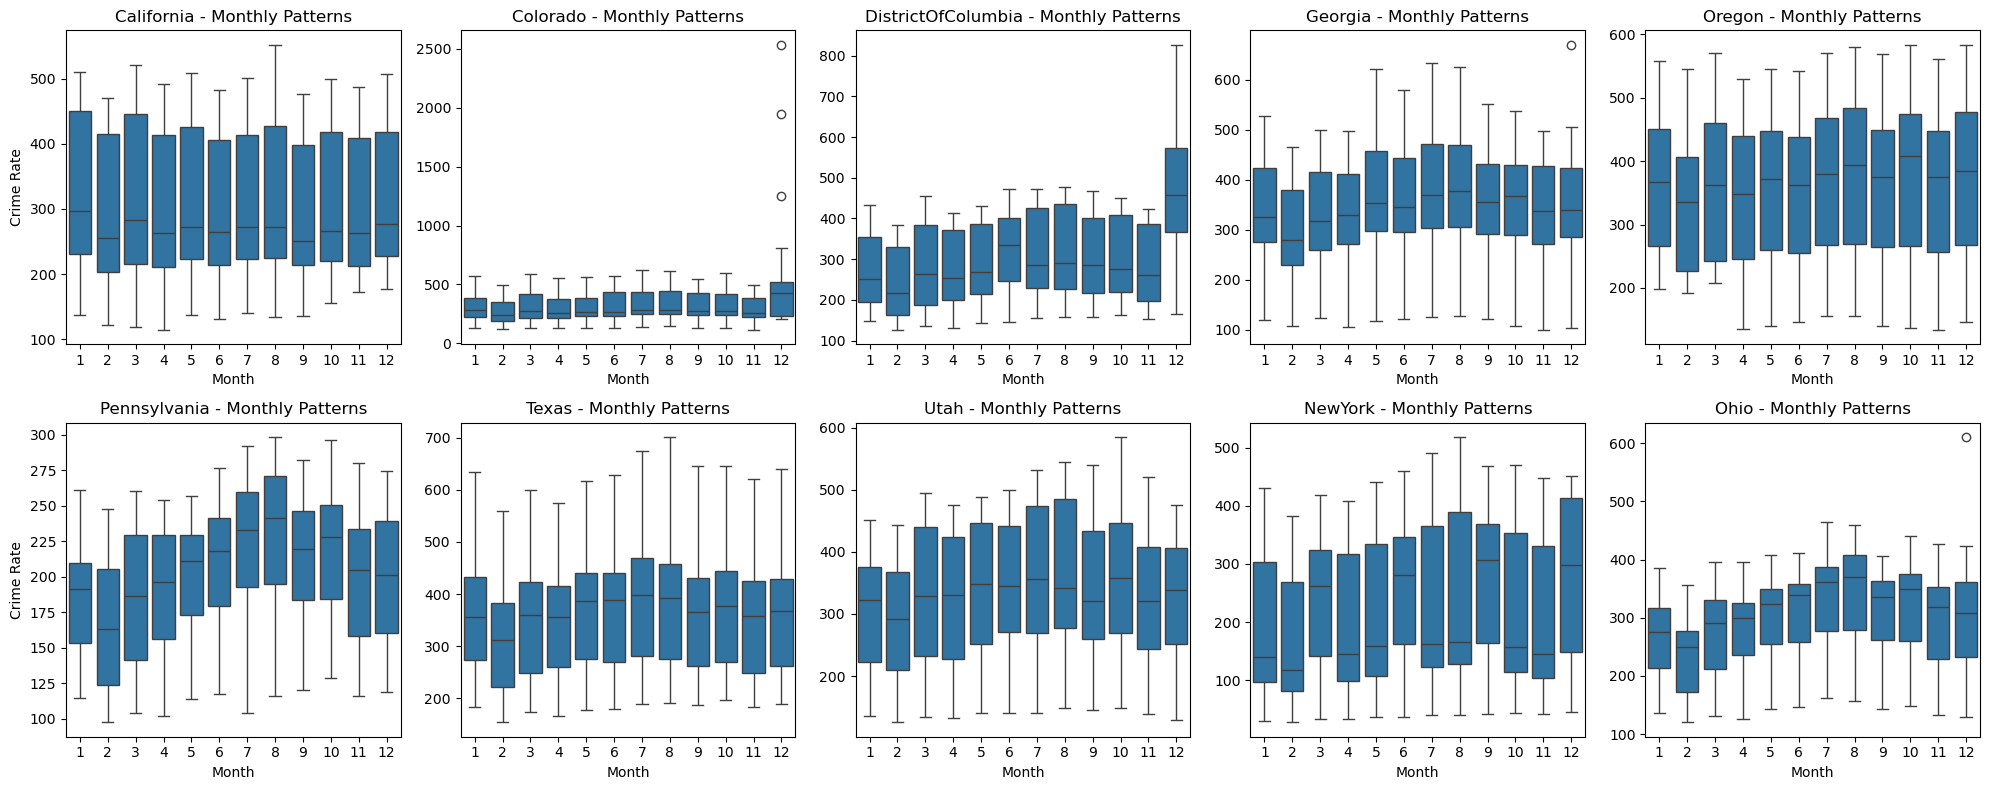

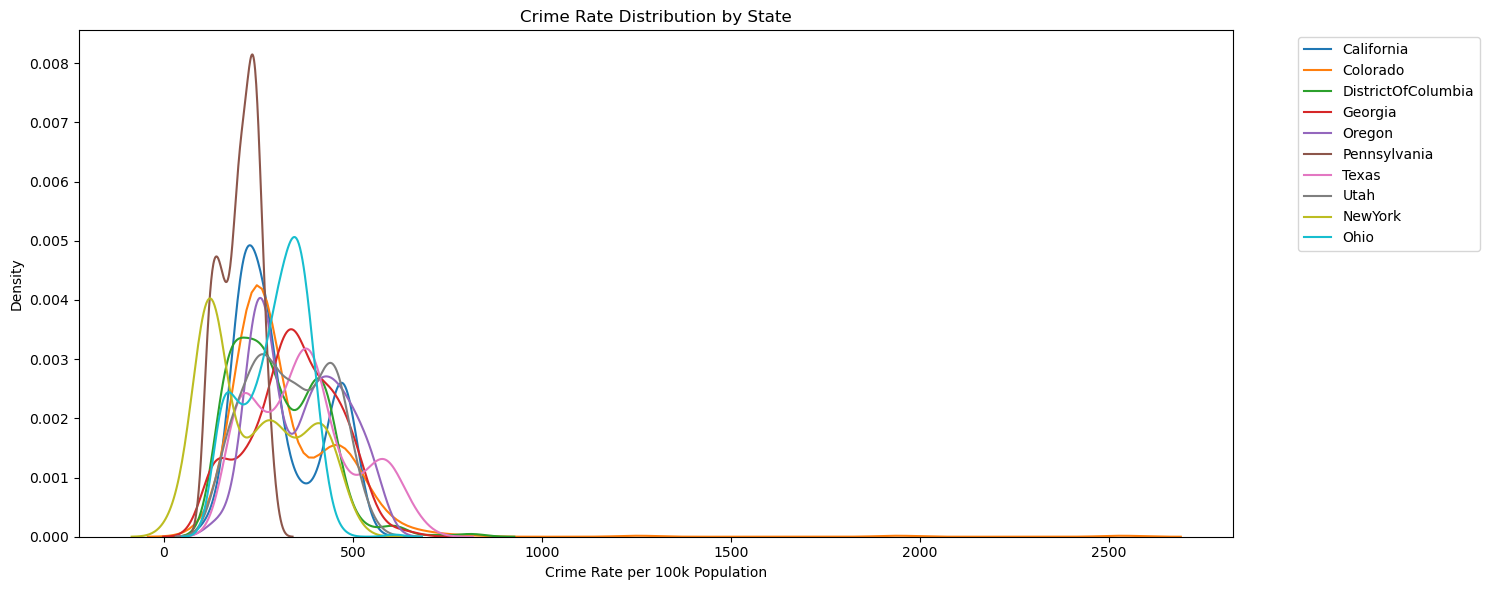

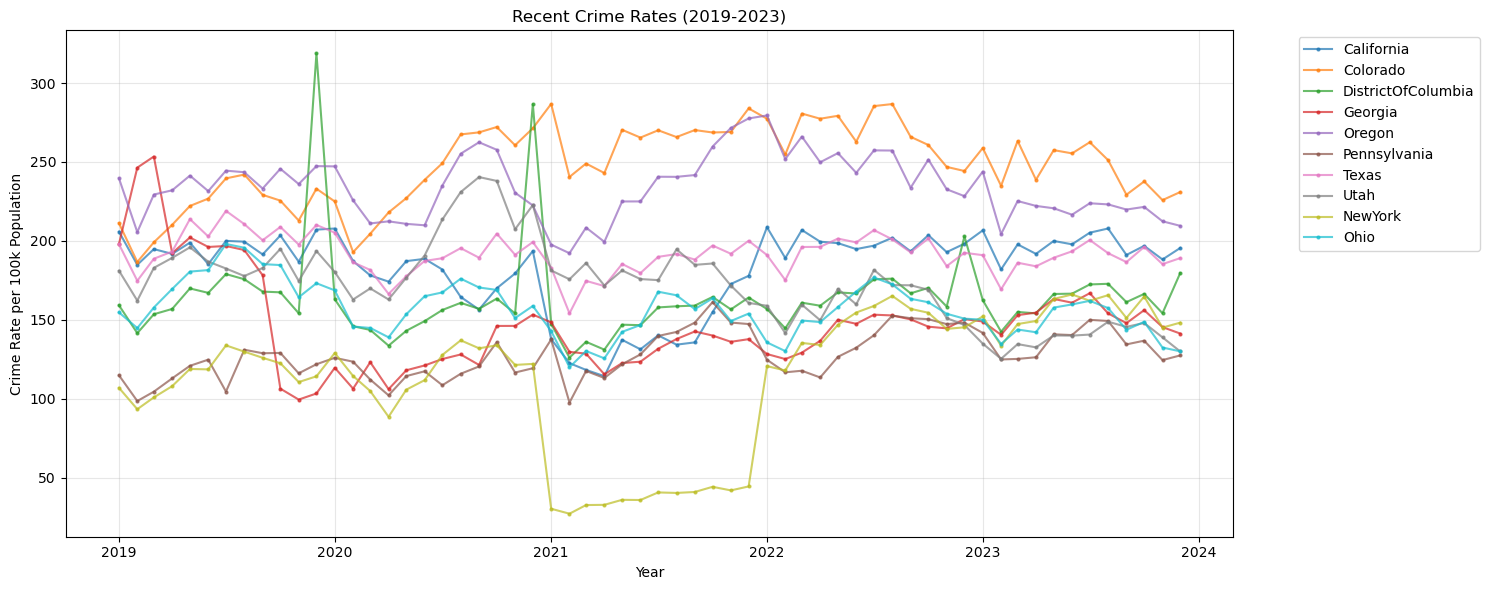


Summary Statistics by State:
                      mean     std     min      max
state                                              
California          306.36  110.30  114.27   552.10
Colorado            327.40  178.76  114.44  2534.36
DistrictOfColumbia  301.26  114.14  126.03   827.33
Georgia             343.02  115.22   99.44   670.74
Oregon              360.81  112.79  133.72   583.79
Pennsylvania        200.28   48.32   97.53   298.24
Texas               369.85  133.15  154.05   700.82
Utah                331.64  106.79  125.26   584.81
NewYork             235.22  128.10   27.14   518.26
Ohio                295.00   82.13  119.93   610.53


In [6]:
def create_crime_visualizations(df):
    """
    Create comprehensive crime rate visualizations for tech hub states
    """
    # Get all tech hub states
    tech_hub_states = ['California', 'Colorado', 'DistrictOfColumbia', 'Georgia',
                       'Oregon', 'Pennsylvania', 'Texas', 'Utah', 'NewYork', 'Ohio']
    
    # Clean data
    df = df.drop(['Unnamed: 0', 'crime_rate_filled'], axis=1).copy()
    df['month'] = df['date'].dt.month
    
    # 1. Seasonal Patterns
    n_cols = 5  # Number of columns in the subplot grid
    n_rows = (len(tech_hub_states) + n_cols - 1) // n_cols  # Calculate needed rows
    
    plt.figure(figsize=(20, 4*n_rows))
    for idx, state in enumerate(tech_hub_states):
        plt.subplot(n_rows, n_cols, idx+1)
        state_data = df[df['state'] == state]
        sns.boxplot(data=state_data, x='month', y='crime_rate')
        plt.title(f'{state} - Monthly Patterns')
        plt.xlabel('Month')
        plt.ylabel('Crime Rate' if idx % n_cols == 0 else '')
        plt.xticks(range(12), range(1,13))  # Make x-axis labels clearer
    plt.tight_layout()
    plt.show()

    # 2. Distribution Comparison
    plt.figure(figsize=(15, 6))
    for state in tech_hub_states:
        state_data = df[df['state'] == state]
        sns.kdeplot(data=state_data, x='crime_rate', label=state)
    plt.title('Crime Rate Distribution by State')
    plt.xlabel('Crime Rate per 100k Population')
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 3. Recent Trends (Last 5 Years)
    recent_data = df[df['date'] >= '2019-01-01']
    
    plt.figure(figsize=(15, 6))
    for state in tech_hub_states:
        state_data = recent_data[recent_data['state'] == state]
        plt.plot(state_data['date'], state_data['crime_rate'], 
                label=state, marker='.', alpha=0.7, markersize=4)
    plt.title('Recent Crime Rates (2019-2023)')
    plt.xlabel('Year')
    plt.ylabel('Crime Rate per 100k Population')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 4. Summary Statistics Table
    summary_stats = df.groupby('state')['crime_rate'].agg([
        'mean', 'std', 'min', 'max'
    ]).round(2)
    summary_stats = summary_stats.loc[tech_hub_states]
    print("\nSummary Statistics by State:")
    print(summary_stats)
    
    return summary_stats

summary_stats = create_crime_visualizations(df)


# Machine Learning 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv('cleaned_combined_state_crime_rates_no_dupes.csv')
df['date'] = pd.to_datetime(df['date'])
states_of_interest = ['Ohio', 'California', 'NewYork']
df_filtered = df[df['state'].isin(states_of_interest)].copy()

In [17]:
def create_features(df):
    """Create time-based features and lag features"""
    df = df.copy()
    
    # Time-based features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['year_scaled'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
    
    # Create lag features (3, 6, and 12 months)
    for lag in [3, 6, 12]:
        df[f'lag_{lag}'] = df['crime_rate'].shift(lag)
    
    # Drop rows with NaN from lag creation
    df = df.dropna()
    
    return df

In [18]:
def create_simplified_features(df):
    """Create simpler feature set with moving averages"""
    df = df.copy()
    
    # Simple time features
    df['month'] = df['date'].dt.month
    df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)
    df['is_winter'] = df['month'].isin([12, 1, 2]).astype(int)
    
    # Moving averages instead of multiple lags
    df['MA3'] = df['crime_rate'].rolling(window=3).mean()
    df['MA12'] = df['crime_rate'].rolling(window=12).mean()
    
    # Single lag from previous month
    df['prev_month'] = df['crime_rate'].shift(1)
    
    # Same month last year for seasonality
    df['prev_year'] = df['crime_rate'].shift(12)
    
    # Drop rows with NaN
    df = df.dropna()
    
    return df

In [19]:
def train_evaluate_model(state_name, alpha=1.0):
    """Train and evaluate Ridge model for a specific state"""
    # Filter data for the state
    state_data = df[df['state'] == state_name].copy()
    
    # Create features
    state_data = create_simplified_features(state_data)
    
    # Select features
    feature_columns = ['month', 'is_summer', 'is_winter', 
                      'MA3', 'MA12', 'prev_month', 'prev_year']
    X = state_data[feature_columns]
    y = state_data['crime_rate']
    
    # Split data temporally
    split_idx = int(len(state_data) * 0.8)
    X_train = X[:split_idx]
    X_test = X[split_idx:]
    y_train = y[:split_idx]
    y_test = y[split_idx:]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model with Ridge regression
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    print(f"\n=== Metrics for {state_name} ===")
    print(f"Training Set - RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.4f}")
    print(f"Test Set     - RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.4f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': model.coef_
    })
    print(f"\nFeature Importance for {state_name}:")
    print(feature_importance.sort_values('Coefficient', key=abs, ascending=False))
    
    # Plot predictions over time for test set
    test_dates = state_data['date'][split_idx:].reset_index(drop=True)
    
    plt.figure(figsize=(15, 6))
    plt.plot(test_dates, y_test.values, label='Actual', alpha=0.7)
    plt.plot(test_dates, y_pred_test, label='Predicted', alpha=0.7)
    plt.title(f'{state_name} - Test Set: Actual vs Predicted Over Time')
    plt.xlabel('Date')
    plt.ylabel('Crime Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return model, scaler, train_rmse, test_rmse, train_r2, test_r2


Processing California...

=== Metrics for California ===
Training Set - RMSE: 11.78, MAE: 9.18, R²: 0.9868
Test Set     - RMSE: 13.42, MAE: 9.33, R²: 0.6933

Feature Importance for California:
      Feature  Coefficient
3         MA3    41.148358
6   prev_year    27.104859
4        MA12    19.524919
5  prev_month    13.610192
0       month     1.378487
1   is_summer     0.932326
2   is_winter     0.275924


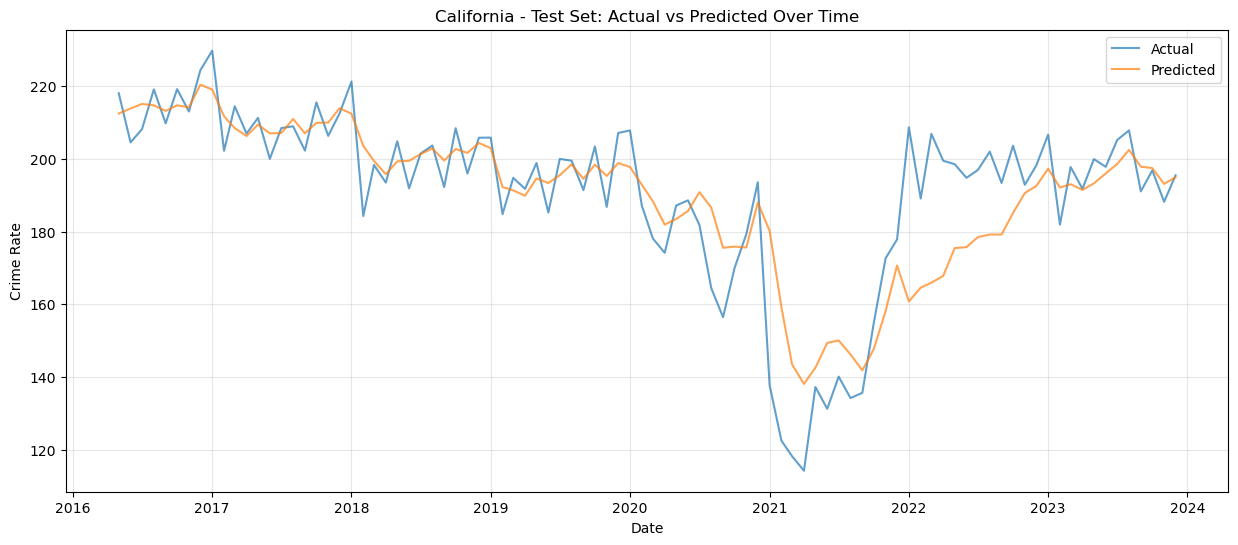


Processing Colorado...

=== Metrics for Colorado ===
Training Set - RMSE: 106.62, MAE: 39.08, R²: 0.6942
Test Set     - RMSE: 23.59, MAE: 20.06, R²: -0.0066

Feature Importance for Colorado:
      Feature  Coefficient
3         MA3   144.818741
6   prev_year    65.518663
5  prev_month   -62.524850
0       month    19.141111
4        MA12    -8.472622
1   is_summer     2.692684
2   is_winter    -0.712108


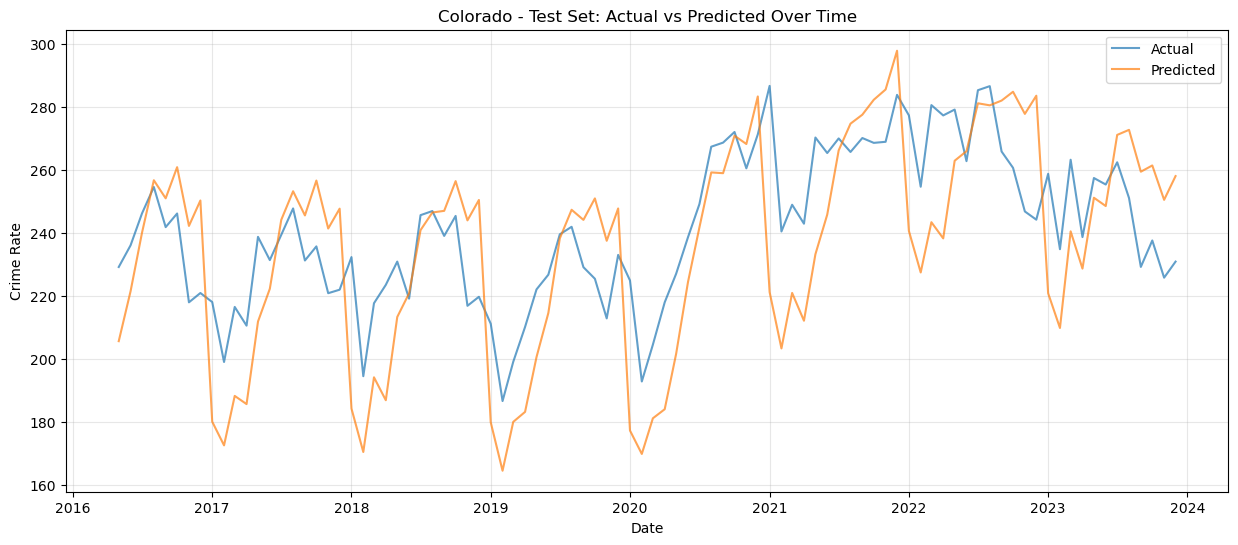


Processing DistrictOfColumbia...

=== Metrics for DistrictOfColumbia ===
Training Set - RMSE: 26.27, MAE: 15.84, R²: 0.9382
Test Set     - RMSE: 16.25, MAE: 10.64, R²: 0.8374

Feature Importance for DistrictOfColumbia:
      Feature  Coefficient
6   prev_year    78.516769
3         MA3    25.107654
5  prev_month    -9.261880
0       month     7.113968
4        MA12     4.235369
2   is_winter     1.900104
1   is_summer     1.292326


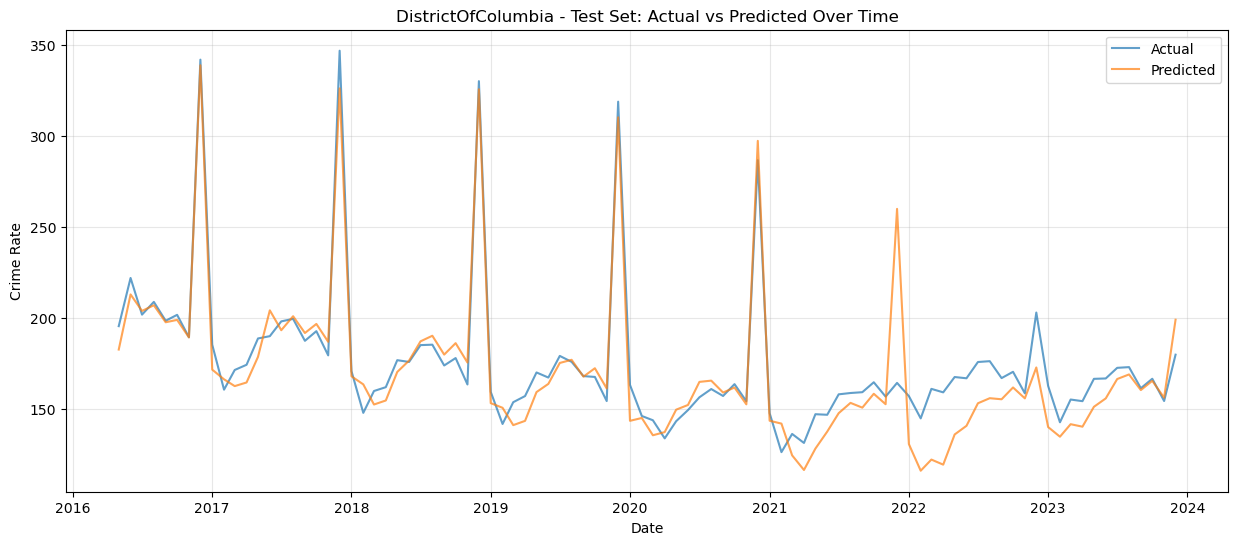


Processing Florida...

=== Metrics for Florida ===
Training Set - RMSE: 355.49, MAE: 184.80, R²: 0.8386
Test Set     - RMSE: 187.32, MAE: 124.75, R²: 0.8616

Feature Importance for Florida:
      Feature  Coefficient
6   prev_year   599.565112
3         MA3   278.316500
5  prev_month  -117.070991
0       month   110.980947
2   is_winter   -17.942096
4        MA12    12.017675
1   is_summer    -5.950489


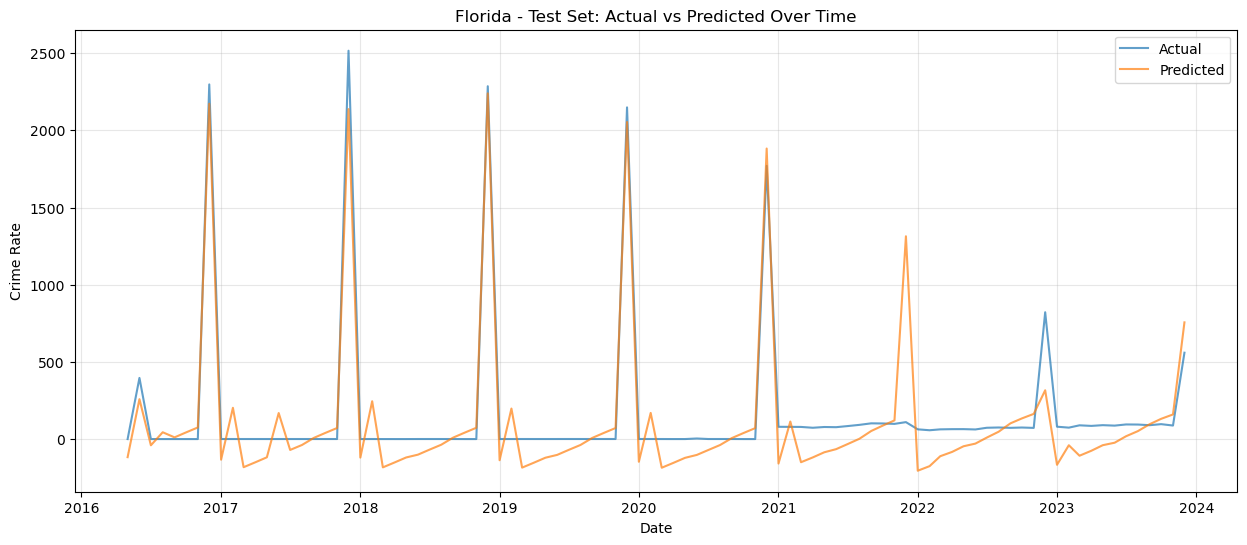


Processing Oregon...

=== Metrics for Oregon ===
Training Set - RMSE: 20.38, MAE: 14.59, R²: 0.9623
Test Set     - RMSE: 12.13, MAE: 9.64, R²: 0.5813

Feature Importance for Oregon:
      Feature  Coefficient
3         MA3    68.833460
6   prev_year    15.022834
4        MA12    11.180175
5  prev_month     7.475356
0       month     3.890090
2   is_winter    -3.017160
1   is_summer     2.263573


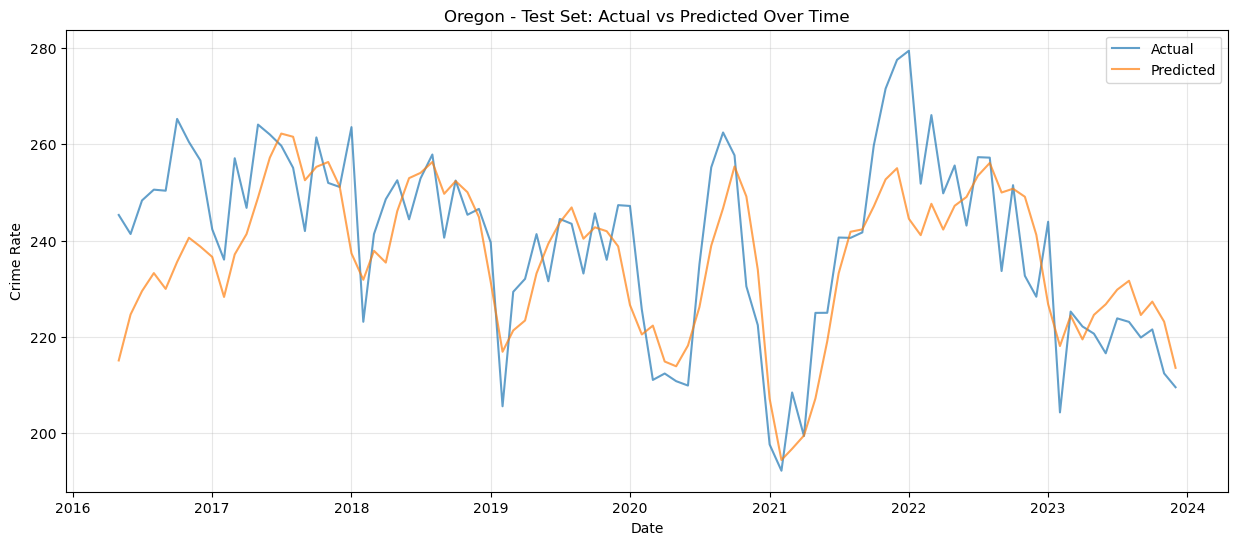


Processing Pennsylvania...

=== Metrics for Pennsylvania ===
Training Set - RMSE: 8.40, MAE: 6.43, R²: 0.9500
Test Set     - RMSE: 8.82, MAE: 6.60, R²: 0.6859

Feature Importance for Pennsylvania:
      Feature  Coefficient
3         MA3    21.442389
6   prev_year     8.755615
4        MA12     7.317620
2   is_winter    -4.508427
1   is_summer     4.349354
5  prev_month    -2.683310
0       month     1.089996


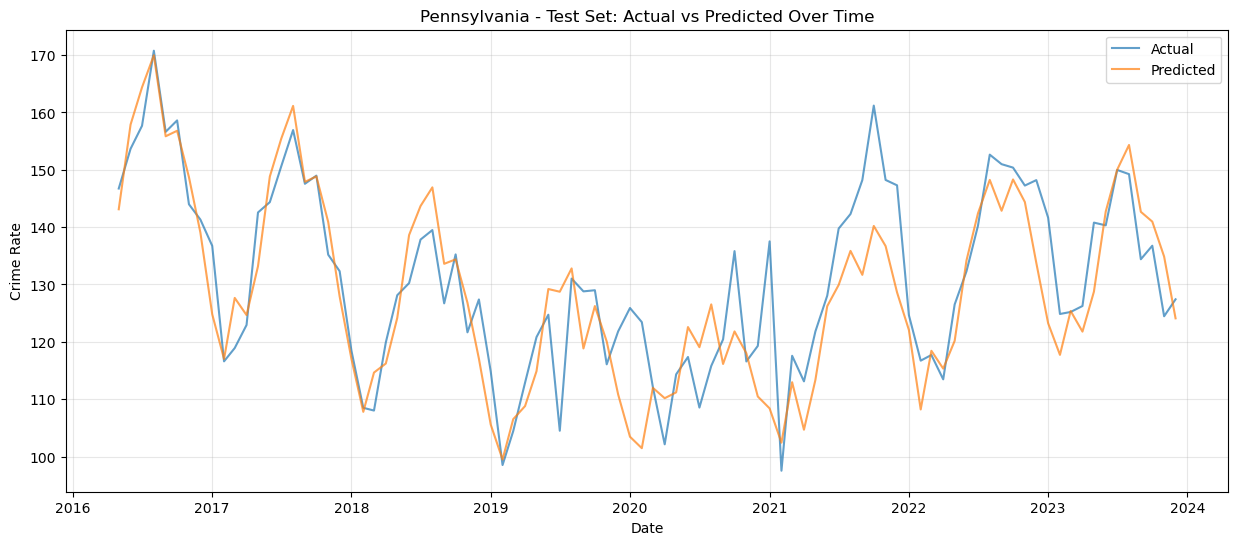


Processing Texas...

=== Metrics for Texas ===
Training Set - RMSE: 15.93, MAE: 12.29, R²: 0.9807
Test Set     - RMSE: 9.23, MAE: 7.47, R²: 0.7144

Feature Importance for Texas:
      Feature  Coefficient
3         MA3    47.438779
6   prev_year    29.023842
4        MA12    22.611899
5  prev_month    13.792525
2   is_winter    -5.262917
1   is_summer     4.155564
0       month     0.502080


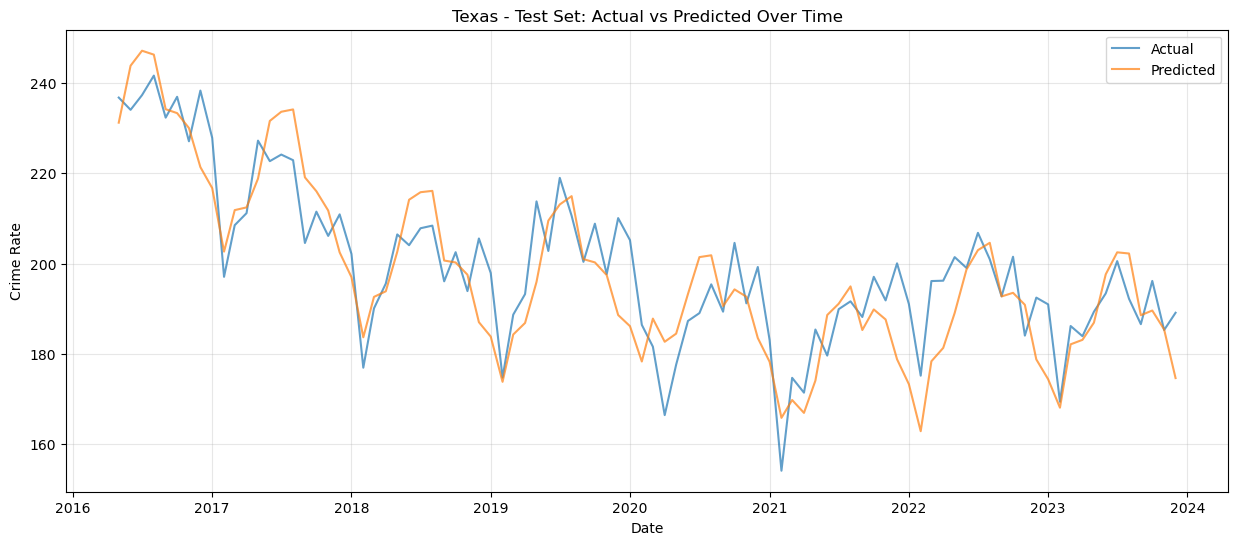


Processing Utah...

=== Metrics for Utah ===
Training Set - RMSE: 18.88, MAE: 14.16, R²: 0.9551
Test Set     - RMSE: 11.30, MAE: 8.84, R²: 0.9037

Feature Importance for Utah:
      Feature  Coefficient
3         MA3    56.105890
6   prev_year    15.768575
4        MA12    14.619532
2   is_winter    -6.624530
1   is_summer     4.797091
0       month    -0.832566
5  prev_month    -0.612924


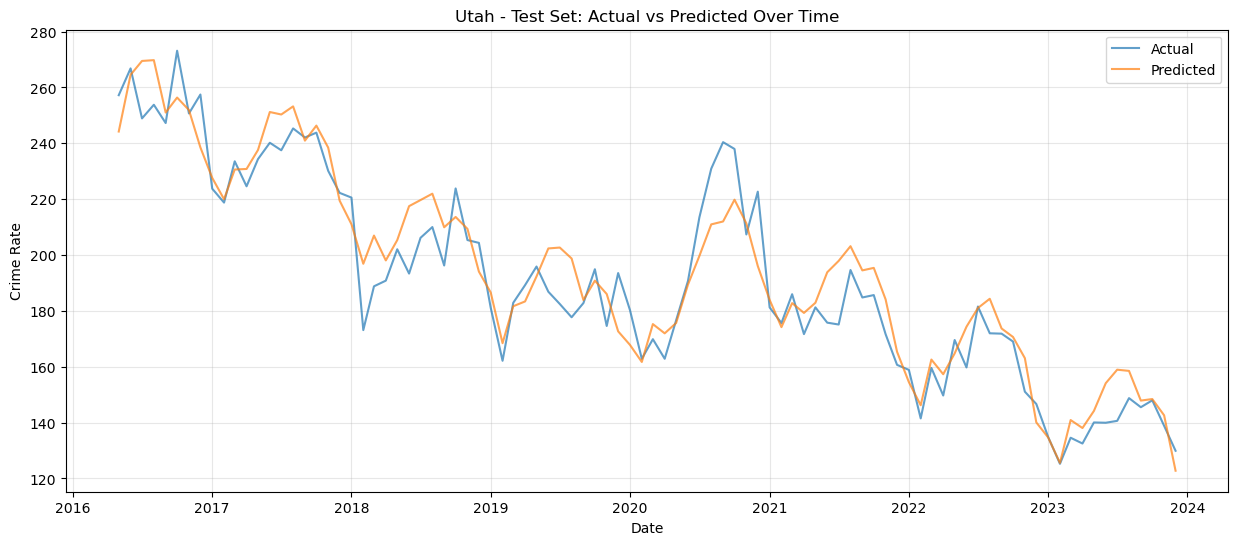


Processing NewYork...

=== Metrics for NewYork ===
Training Set - RMSE: 30.87, MAE: 19.82, R²: 0.9397
Test Set     - RMSE: 39.59, MAE: 24.52, R²: -0.2080

Feature Importance for NewYork:
      Feature  Coefficient
6   prev_year    88.327086
3         MA3    33.924004
5  prev_month   -17.032544
4        MA12    13.593411
0       month     2.770279
1   is_summer     1.878937
2   is_winter    -0.767446


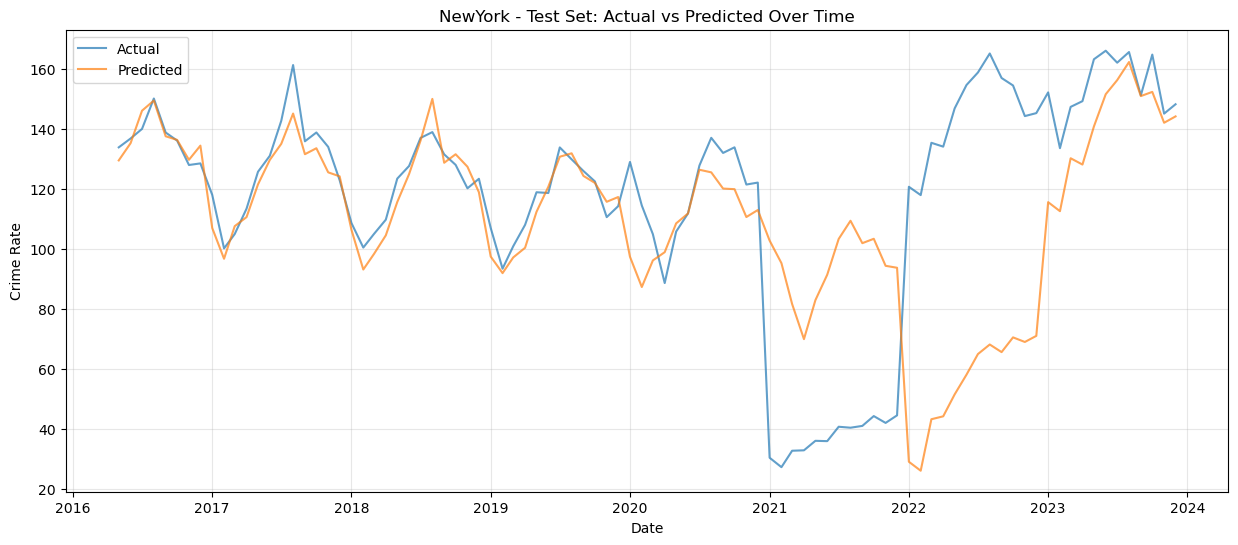


Processing Ohio...

=== Metrics for Ohio ===
Training Set - RMSE: 17.79, MAE: 11.40, R²: 0.9148
Test Set     - RMSE: 10.06, MAE: 8.22, R²: 0.8877

Feature Importance for Ohio:
      Feature  Coefficient
3         MA3    41.930853
4        MA12    11.588162
6   prev_year    10.290034
5  prev_month    -9.442780
2   is_winter    -7.906189
1   is_summer     7.503639
0       month     2.952839


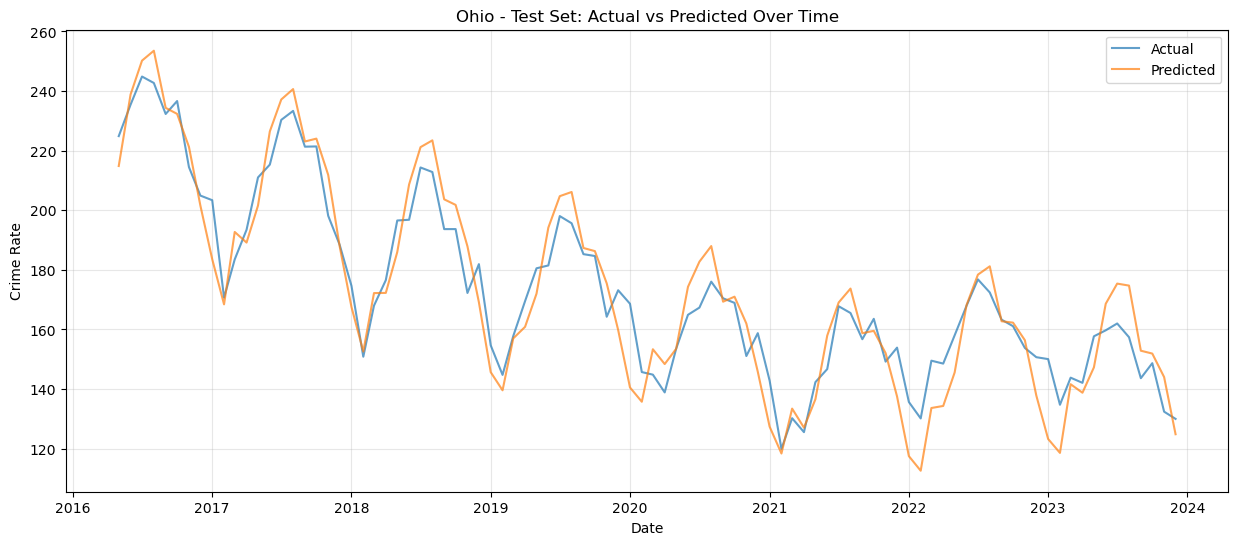


=== Comparison Across States ===
                    train_rmse  test_rmse  train_r2  test_r2
California             11.7763    13.4193    0.9868   0.6933
Colorado              106.6249    23.5934    0.6942  -0.0066
DistrictOfColumbia     26.2682    16.2522    0.9382   0.8374
Florida               355.4859   187.3189    0.8386   0.8616
Oregon                 20.3761    12.1332    0.9623   0.5813
Pennsylvania            8.3954     8.8187    0.9500   0.6859
Texas                  15.9279     9.2325    0.9807   0.7144
Utah                   18.8799    11.2970    0.9551   0.9037
NewYork                30.8665    39.5859    0.9397  -0.2080
Ohio                   17.7882    10.0623    0.9148   0.8877


In [20]:
from sklearn.linear_model import Ridge

# Train and evaluate models for each state
states = ['California', 'Colorado', 'DistrictOfColumbia', 'Florida','Oregon', 'Pennsylvania', 'Texas', 'Utah','NewYork', 'Ohio']
state_models = {}
state_metrics = {}

for state in states:
    print(f"\nProcessing {state}...")
    model, scaler, train_rmse, test_rmse, train_r2, test_r2 = train_evaluate_model(state, alpha=10.0)
    state_models[state] = (model, scaler)
    state_metrics[state] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

# Compare metrics across states
metrics_df = pd.DataFrame.from_dict(state_metrics, orient='index')
print("\n=== Comparison Across States ===")
print(metrics_df.round(4))

## Finetune 

So our models are looking good. Colorado and New York prove to be problematic however, I speculate this is due to COVID-19 and the George Floyd protests so there are some cofounding variables at work that go beyond the scope of this time-series. For the meantime, I will omit these stats. 